1. mnist

In [2]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
(X, y), (Xtest, y_test) = mnist.load_data()
y_train=to_categorical(y)
y_test=to_categorical(y_test)

In [2]:
X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = Xtest.reshape((10000, 28*28))
X_test = X_test/255

In [37]:
net= tf.keras.models.Sequential()
net.add(tf.keras.layers.Dense(256, activation = 'relu')) 
net.add(tf.keras.layers.Dense(512, activation = 'relu'))
net.add(tf.keras.layers.Dropout(0.4))
net.add(tf.keras.layers.Dense(64, activation = 'relu'))
net.add(tf.keras.layers.Dropout(0.4))
net.add(tf.keras.layers.Dense(10, activation = 'softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [39]:
val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=128, validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 149us/sample - loss: 0.3989 - accuracy: 0.8818 - val_loss: 0.1621 - val_accuracy: 0.9507
Epoch 2/10
50000/50000 [==============================] - 6s 127us/sample - loss: 0.1471 - accuracy: 0.9597 - val_loss: 0.1226 - val_accuracy: 0.9632
Epoch 3/10
50000/50000 [==============================] - 6s 127us/sample - loss: 0.1026 - accuracy: 0.9713 - val_loss: 0.0932 - val_accuracy: 0.9724
Epoch 4/10
50000/50000 [==============================] - 6s 129us/sample - loss: 0.0771 - accuracy: 0.9780 - val_loss: 0.0942 - val_accuracy: 0.9743
Epoch 5/10
50000/50000 [==============================] - 6s 125us/sample - loss: 0.0561 - accuracy: 0.9837 - val_loss: 0.0764 - val_accuracy: 0.9783
Epoch 6/10
50000/50000 [==============================] - 6s 128us/sample - loss: 0.0470 - accuracy: 0.9864 - val_loss: 0.0888 - val_accuracy: 0.9770
Epoch 7/10
50000/50000 [==========================

In [40]:
test_loss, test_acc = net.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [41]:
np.argmax(net.predict(X_test)[3])

0

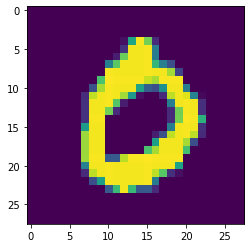

In [42]:
plt.imshow(Xtest[3])

2. fashion

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x1, y1), (x1_test, y1_test) = fashion_mnist.load_data()

In [5]:
x1.shape

(60000, 28, 28)

In [6]:
y1_train=to_categorical(y1)
y1_test=to_categorical(y1_test)

In [7]:
x1_train = x1.reshape((60000, 28*28))
x1_train = x1_train/255
x1_test = x1_test.reshape((10000, 28*28))
x1_test = x1_test/255

In [14]:
model= tf.keras.models.Sequential() 
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation = 'softmax')) 
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
x1_val = x1_train[:10000]
partial_x1_train = x1_train[10000:]
y1_val = y1_train[:10000]
partial_y1_train = y1_train[10000:]

In [16]:
val2= model.fit(partial_x1_train,partial_y1_train,epochs=10, batch_size=128, validation_data=(x1_val, y1_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 230us/sample - loss: 0.5794 - accuracy: 0.7917 - val_loss: 0.4363 - val_accuracy: 0.8411
Epoch 2/10
50000/50000 [==============================] - 11s 214us/sample - loss: 0.4067 - accuracy: 0.8511 - val_loss: 0.3744 - val_accuracy: 0.8604
Epoch 3/10
50000/50000 [==============================] - 11s 216us/sample - loss: 0.3648 - accuracy: 0.8662 - val_loss: 0.3466 - val_accuracy: 0.8753
Epoch 4/10
50000/50000 [==============================] - 11s 222us/sample - loss: 0.3394 - accuracy: 0.8756 - val_loss: 0.3464 - val_accuracy: 0.8734
Epoch 5/10
50000/50000 [==============================] - 11s 219us/sample - loss: 0.3237 - accuracy: 0.8809 - val_loss: 0.3151 - val_accuracy: 0.8847
Epoch 6/10
50000/50000 [==============================] - 11s 220us/sample - loss: 0.3090 - accuracy: 0.8848 - val_loss: 0.3140 - val_accuracy: 0.8851
Epoch 7/10
50000/50000 [====================

In [17]:
test_loss, test_acc = model.evaluate(x1_test,y1_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  401920    
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_7 (Dense)              multiple                  131328    
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [41]:
np.argmax(model.predict(x1_test)[0]), np.argmax(model.predict(x1_test)[1])

(9, 2)

In [46]:
x2_test = x1_test.reshape(10000,28,28)

(<matplotlib.image.AxesImage at 0x27aa3579188>, 9)

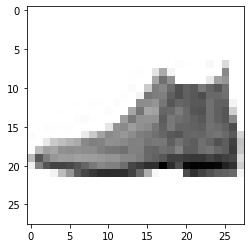

In [49]:
plt.imshow(x2_test[0],cmap=plt.cm.binary) ,y1[0],

(<matplotlib.image.AxesImage at 0x27aa3638948>, 0)

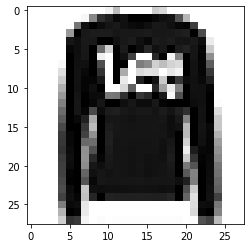

In [52]:
plt.imshow(x2_test[1],cmap=plt.cm.binary),y1[1]